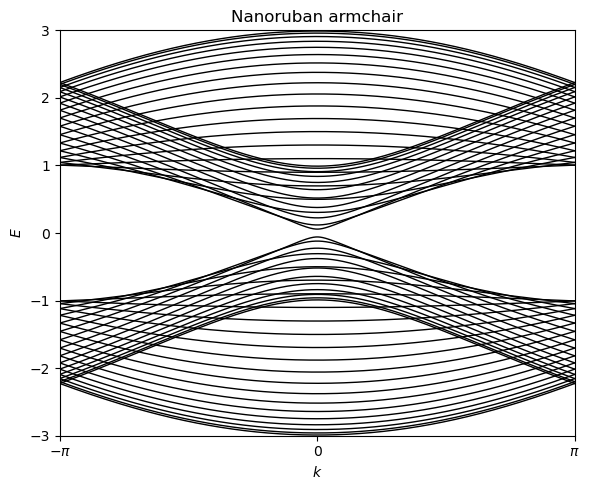

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
t = 1.0       # Paramètre de saut (peut être ajusté)
N = 30      # Largeur du ruban (nombre de sous-bandes)
num_k = 1000   # Nombre de points en k

# Vecteur d'onde k entre -π et π
k_vals = np.linspace(-np.pi, np.pi, num_k)

# Préparation de la figure
plt.figure(figsize=(6, 5))

for r in range(1, N+1):
    # Quantification transverse
    p = r * np.pi / (N + 1)
    epsilon_p = 2.0 * np.cos(p)

    # Calcul de E(k, p) pour la branche positive et négative
    # E(k,p) = ± t sqrt(1 + 2 epsilon_p cos(k/2) + epsilon_p^2)
    E_plus = t * np.sqrt(1 + 2 * epsilon_p * np.cos(k_vals / 2) + epsilon_p**2)
    E_minus = -E_plus

    # Tracé des branches
    plt.plot(k_vals, E_plus, color='black', linewidth=1)
    plt.plot(k_vals, E_minus, color='black', linewidth=1)

# Ajustement des axes
plt.xlim(-np.pi, np.pi)
plt.ylim(-3, 3)  
# Paramétrage des graduations en k
plt.xticks([-np.pi, 0, np.pi], [r'$-\pi$', '0', r'$\pi$'])

# Labels et titre 
plt.xlabel(r'$k$')
plt.ylabel(r'$E$')
plt.title("Nanoruban armchair")

# Optionnel 
plt.grid(False)

# Affichage
plt.tight_layout()
plt.show()

# Implémentation de l'Hamiltonien pour un Nanoruban Armchair

Nous considérons un modèle tight-binding pour un nanoruban armchair de largeur $N$ (c'est-à-dire comportant $N$ cellules, chacune contenant deux sites $a$ et $b$).  
On travaille dans la base
$$
\{\,a_1,\,b_1,\,a_2,\,b_2,\,\dots,\,a_N,\,b_N\,\},
$$
et l'Hamiltonien en espace $k$ s'écrit
$$
H = \sum_{k} \Psi^\dagger(k)\, H(k)\, \Psi(k),
$$
avec
$$
\Psi^\dagger(k)=\Bigl(a_1^\dagger(k),\,b_1^\dagger(k),\,a_2^\dagger(k),\,b_2^\dagger(k),\,\dots,\,a_N^\dagger(k),\,b_N^\dagger(k)\Bigr).
$$

L'hamiltonien se décompose en deux contributions principales :

1. **Sauts intra–cellule**  
   Dans chaque cellule $m$ (pour $m=1,\dots,N$), les sites $a_m$ et $b_m$ sont couplés par une amplitude $t$ (sans facteur de phase).  
   Cela se traduit par :
   $$
   H_{2m-1,\,2m} = t \quad \text{et} \quad H_{2m,\,2m-1} = t.
   $$

2. **Sauts inter–cellule**  
   Entre deux cellules adjacentes $m$ et $m+1$ (pour $m=1,\dots,N-1$), on distingue deux types de couplages, tous deux associés à une amplitude $te$ :

   - **Type 1 :**  
     Relier le site $b_m$ de la cellule $m$ au site $a_{m+1}$ de la cellule $m+1$ (sans facteur de phase) :
     $$
     H_{2m,\,2(m+1)-2} = te \quad \text{et} \quad H_{2(m+1)-2,\,2m} = te.
     $$

   - **Type 2 :**  
     Relier le site $a_m$ de la cellule $m$ au site $b_{m+1}$ de la cellule $m+1$ avec un facteur de phase $e^{-ik\,a}$ (où $a$ est la constante de réseau) :
     $$
     H_{2m-1,\,2(m+1)-1} = te\,e^{-ik\,a} \quad \text{et} \quad H_{2(m+1)-1,\,2m-1} = te\,e^{ik\,a}.
     $$

L'expression générale de l'hamiltonien $H(k)$ utilisé dans le code est donc :
$$
\boxed{
\begin{aligned}
H(k) = & \sum_{m=1}^{N} \Bigl\{ \; t \Bigl[ a_m^\dagger(k)\, b_m(k) + b_m^\dagger(k)\, a_m(k) \Bigr] \Bigr\} \\
& + \sum_{m=1}^{N-1} \Biggl\{ \; te\, \Bigl[ b_m^\dagger(k)\, a_{m+1}(k) + a_{m+1}^\dagger(k)\, b_m(k) \Bigr] \\
& \quad\quad\quad\quad\; + \; te\, \Bigl[ e^{-ik\,a}\, a_m^\dagger(k)\, b_{m+1}(k) + e^{ik\,a}\, b_{m+1}^\dagger(k)\, a_m(k) \Bigr] \Biggr\}.
\end{aligned}
}
$$

Dans la représentation matricielle (de dimension $2N\times 2N$), on indexe les sites de la manière suivante :  
- Les indices $2m-1$ et $2m$ correspondent respectivement à $a_m$ et $b_m$ dans la cellule $m$.  
- Les termes intra–cellule se placent sur les éléments $(2m-1,\,2m)$ et $(2m,\,2m-1)$.  
- Les termes inter–cellule de type 1 se placent sur les éléments reliant $b_m$ et $a_{m+1}$, c'est-à-dire aux positions $(2m,\,2(m+1)-2)$ et $(2(m+1)-2,\,2m)$.  
- Les termes inter–cellule de type 2 se placent sur les éléments reliant $a_m$ et $b_{m+1}$, c'est-à-dire aux positions $(2m-1,\,2(m+1)-1)$ et $(2(m+1)-1,\,2m-1)$, avec le facteur de phase associé.

Pour $N=2$, on retrouve ainsi la matrice :
$$
H(k)=
\begin{pmatrix}
0 & t & 0 & te\,e^{-ik\,a} \\
t & 0 & te & 0 \\
0 & te & 0 & t \\
te\,e^{ik\,a} & 0 & t & 0
\end{pmatrix}.
$$

Le code Python ci-dessous implémente cet hamiltonien et calcule la structure de bandes pour $k$ variant de $-\pi$ à $\pi$.

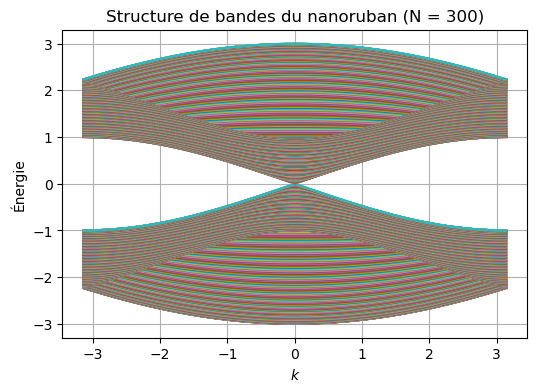

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
a = 1.0                    # Constante de réseau
kpts = np.linspace(-np.pi/a, np.pi/a, 500)
t = -1.0                   # Amplitude de saut intra–cellule
te = -1.0          # Amplitude de saut inter–cellule
N = 300                      # Largeur du nanoruban

def hamiltonian_k(k, N, a, t, te):
    """
    Construit la matrice du Hamiltonien H(k) de dimension 2N x 2N,
    dans la base [a1, b1, a2, b2, ..., aN, bN].

    - Sauts intra–cellule : pour chaque cellule m,
      H[2*m-2, 2*m-1] = t et H[2*m-1, 2*m-2] = t.

    - Sauts inter–cellule (de la cellule m à m+1 pour m = 1,..,N-1) :
      * Type 1 : entre b_m et a_{m+1} (sans phase) : H[2*m-1, 2*(m+1)-2] = te.
      * Type 2 : entre a_m et b_{m+1} (avec phase) : H[2*m-2, 2*(m+1)-1] = te * exp(-1j*k*a).
    """
    dim = 2 * N
    H = np.zeros((dim, dim), dtype=complex)

    # Sauts intra–cellule : pour chaque cellule m (de 1 à N)
    for m in range(1, N+1):
        i = 2*m - 2  # indice de a_m (Python: 0-indexé)
        j = 2*m - 1  # indice de b_m
        H[i, j] = t
        H[j, i] = t

    # Sauts inter–cellule : pour m de 1 à N-1 (entre cellule m et m+1)
    for m in range(1, N):
        # Type 1 : liaison entre b_m (cellule m) et a_{m+1} (cellule m+1) sans phase
        i = 2*m - 1              # indice de b_m
        j = 2*(m + 1) - 2        # indice de a_{m+1}
        H[i, j] = te
        H[j, i] = te

        # Type 2 : liaison entre a_m (cellule m) et b_{m+1} (cellule m+1) avec facteur de phase e^{-ik*a}
        i = 2*m - 2              # indice de a_m
        j = 2*(m + 1) - 1        # indice de b_{m+1}
        H[i, j] = te * np.exp(-1j * k * a)
        H[j, i] = te * np.exp(1j * k * a)

    return H

def energy(k, N, a, t, te):
    H = hamiltonian_k(k, N, a, t, te)
    E, _ = np.linalg.eig(H)
    return np.sort(E)

# Calcul des énergies pour chaque k
E_all = np.array([energy(k, N, a, t, te) for k in kpts])

# Affichage de la structure de bandes
plt.figure(figsize=(6, 4))
for band in range(2 * N):
    plt.plot(kpts, E_all[:, band].real)
plt.xlabel('$k$')
plt.ylabel('Énergie')
plt.title(f'Structure de bandes du nanoruban (N = {N})')
plt.grid(True)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Paramètres globaux (vous pouvez les ajuster selon vos besoins)
a = 1.0
kpts = np.linspace(-np.pi/a, np.pi/a, 400)
t = -2.7
te = -2.7 * 1.12

def hamiltonian_k(k, N, a, t, te):
    """
    Construit la matrice du Hamiltonien H(k) de dimension 2N x 2N,
    dans la base [a1, b1, a2, b2, ..., aN, bN].
    """
    dim = 2 * N
    H = np.zeros((dim, dim), dtype=complex)

    # Sauts intra–cellule : pour chaque cellule m (de 1 à N)
    for m in range(1, N+1):
        i = 2*m - 2  # indice de a_m (Python: 0-indexé)
        j = 2*m - 1  # indice de b_m
        H[i, j] = t
        H[j, i] = t

    # Sauts inter–cellule : pour m de 1 à N-1
    for m in range(1, N):
        # Type 1 : liaison b_m -> a_{m+1} (sans phase)
        i = 2*m - 1              # b_m
        j = 2*(m + 1) - 2        # a_{m+1}
        H[i, j] = te
        H[j, i] = te

        # Type 2 : liaison a_m -> b_{m+1} (avec phase e^{-ik*a})
        i = 2*m - 2              # a_m
        j = 2*(m + 1) - 1        # b_{m+1}
        H[i, j] = te * np.exp(-1j * k * a)
        H[j, i] = te * np.exp(1j * k * a)

    return H

def band_structure(N=4):
    """
    Calcule et affiche la structure de bandes pour un ruban de largeur N.
    """
    E_all = []
    for k in kpts:
        H = hamiltonian_k(k, N, a, t, te)
        E, _ = np.linalg.eig(H)
        E_all.append(np.sort(E))
    E_all = np.array(E_all)

    plt.figure(figsize=(6, 4))
    for band in range(2*N):
        plt.plot(kpts, E_all[:, band].real, color='C0')
    plt.xlabel('$k$')
    plt.ylabel('Énergie')
    plt.title(f'Structure de bandes du nanoruban (N = {N})')
    plt.grid(True)
    plt.show()

# Utilisation de ipywidgets.interact pour faire varier N
interact(
    band_structure,
    N=IntSlider(min=4, max=30, step=1, value=4, description='Largeur N'))

interactive(children=(IntSlider(value=4, description='Largeur N', max=30, min=4), Output()), _dom_classes=('wi…

<function __main__.band_structure(N=4)>